# Task 1

### Consider the first time series of DLPFC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat                #import mat data
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2
from scipy import special
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mat_file = loadmat('ex3file1.mat')
data = mat_file['DLPFC1'].ravel()

Text(0.5, 1.0, 'DLPFC1 time series')

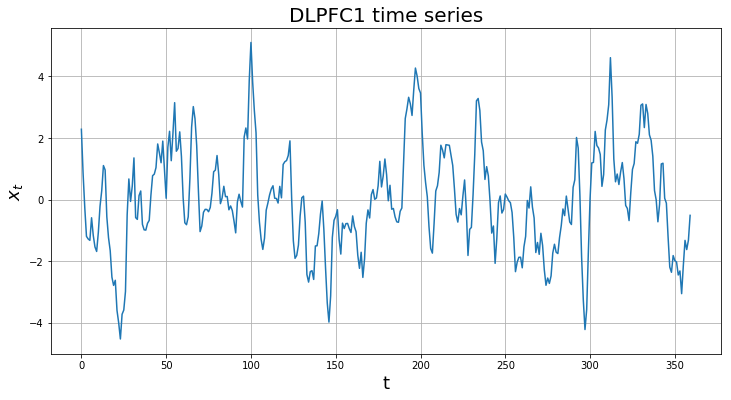

In [3]:
# Plot data
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(data)), data)
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.title('DLPFC1 time series', fontsize = 20)

### 1) Compute the log-likelihood of an AR(4) model

In [4]:
# Coefficient estimation for AR(p) model
def coeff_AR(data, p):
    xT = data[p:]
    
    Xp = np.zeros((len(data)-p,p+1))
    Xp[:,0] = 1
    
    for i in range(1,p+1):
        Xp[:,i] = data[p-i:-i]
    
    temp = np.matmul(np.transpose(Xp),Xp)
    temp = np.linalg.inv(temp)
    a = np.matmul(np.transpose(Xp),xT)
    a = np.matmul(temp,a)
    
    return a

# Inferred time series
def pred(data, p):
    a = coeff_AR(data, p)
    T = len(data)
    
    # predictions
    x_new = np.zeros(T)
    x_new[:p] = data[:p]
    
    for i in range(p,T):
        x_new[i] = a[0] + np.dot(a[1:],np.flip(data[i-p:i]))
    
    return x_new

# Residuals of the AR(p) model
def res(data, p):
    return pred(data,p)[p:] - data[p:]

# Std of the residuals
def sigma(data, p):
    return np.std(res(data, p))

# Log-likelihood for AR(p) model
def log_likelihood(data, p):
    T = len(data)
    
    sigma1 = sigma(data, p)
    square_res = res(data, p)**2
    
    t1 = - (T-p)/2. * np.log(2*np.pi)
    t2 = - (T-p)/2. * np.log(sigma1**2)
    t3 = - np.sum( square_res ) / sigma1**2 / 2.
    
    return t1 + t2 + t3

# Likelihood for AR(p) model
def likelihood(data, p):
    return np.exp(log_likelihood(data, p))

Estimated vector of coefficients: 
[-4.55062900e-04  1.24878325e+00 -4.83247551e-01  2.42845690e-01
 -1.69905103e-01]


Text(0.5, 1.0, 'DLPFC1 time series')

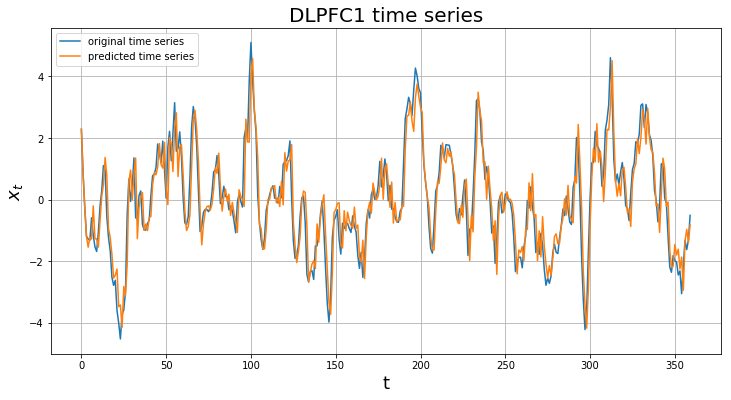

In [5]:
# Coefficient estimation for AR(4) model
a = coeff_AR(data,4)
print("Estimated vector of coefficients: ")
print(a)

# Predicted time series
pred_data = pred(data,4)

# Plot predicted series vs. real series
plt.figure(figsize=[12,6])
plt.plot(np.arange(0,len(data)), data, label='original time series')
plt.plot(np.arange(0,len(pred_data)), pred_data, label='predicted time series')
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.legend()
plt.title('DLPFC1 time series', fontsize = 20)

Log-likelihood for AR(4) model: -365.77319316608975


Text(0.5, 1.0, 'Log-likelihood estimation for different order p')

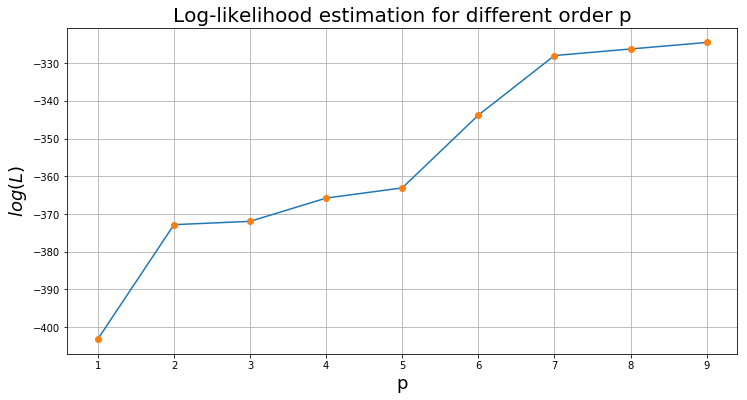

In [6]:
# Compute log-likelihood
ll = log_likelihood(data, 4)
print("Log-likelihood for AR(4) model:", ll)

# Plot log-likelihood function
k = 10
ll = np.zeros(k-1)
for i in range(1,k):
    ll[i-1] = log_likelihood(data, i)

plt.figure(figsize=[12,6])
plt.plot(np.arange(1,k), ll)
plt.plot(np.arange(1,k), ll, 'o')
plt.xlabel('p', fontsize = 18)
plt.ylabel(r'$log(L)$', fontsize = 18)
plt.grid()
plt.title('Log-likelihood estimation for different order p', fontsize = 20)

### 2) Determine the optimal order p of the AR model by computing the log-likelihood-ratio test statistic

In [7]:
def D(data, p1,p2):
    return -2 * (log_likelihood(data, p1) - log_likelihood(data, p2))

Log-likelihood-ratio values:
 [60.64193308  1.75847012 12.34423505  5.40117097 38.60617867 31.59425678
  3.49213027  3.45810727]
Respective chi-square values:
 [1.         0.81518455 0.99955765 0.97987675 1.         0.99999998
 0.93833881 0.93705767]


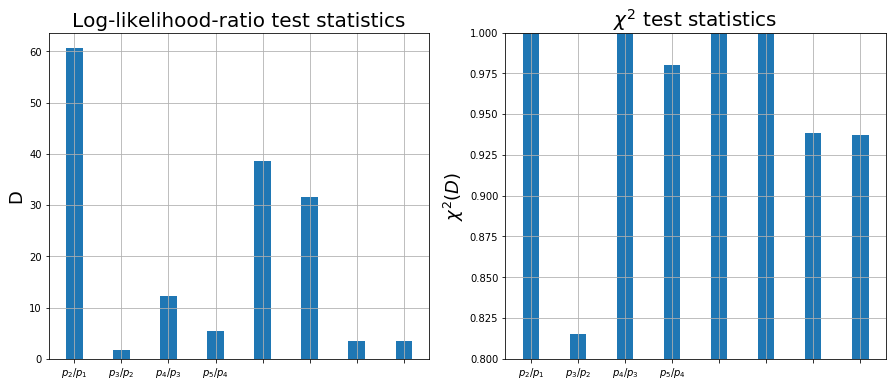

In [8]:
# Log-likelihood-ratio test statistics
Di = np.zeros(k-2)

for i in range(1,k-1):
    Di[i-1] = D(data, i, i+1)
    
print('Log-likelihood-ratio values:\n',Di)
print('Respective chi-square values:\n',chi2.cdf(Di,1))

# Plots
fig1 = plt.subplots(figsize=[15,6])

plt.subplot(1,2,1)
plt.bar(np.arange(0,len(Di)), Di, width=0.35)
plt.xticks(np.arange(0,len(Di)),(r'$p_2/p_1$',r'$p_3/p_2$',r'$p_4/p_3$',r'$p_5/p_4$' ))
plt.ylabel('D', fontsize = 18)
plt.grid()
plt.title('Log-likelihood-ratio test statistics', fontsize = 20)

plt.subplot(1,2,2)
plt.bar(np.arange(0,len(Di)), chi2.cdf(Di,1), width=0.35)
plt.xticks(np.arange(0,len(Di)),(r'$p_2/p_1$',r'$p_3/p_2$',r'$p_4/p_3$',r'$p_5/p_4$' ))
plt.ylabel(r'$\chi^2(D)$', fontsize = 18)
plt.ylim([0.8, 1])
plt.grid()
plt.title(r'$\chi^2$ test statistics', fontsize = 20)

plt.show(fig1)

It can be noticed that the log-likelihood-ratio of the fifth-order model respect to the fourth-order model is smaller than the previous value; this is reflected also in the respective chi-square value, which is smaller than the previous (0.979 compared to 0.999) and it means a loss of significance of the model. For these reasons the optimal order of the AR model is p=4.

# Task 2

### Use all four time series contained in the data file

(360, 4)


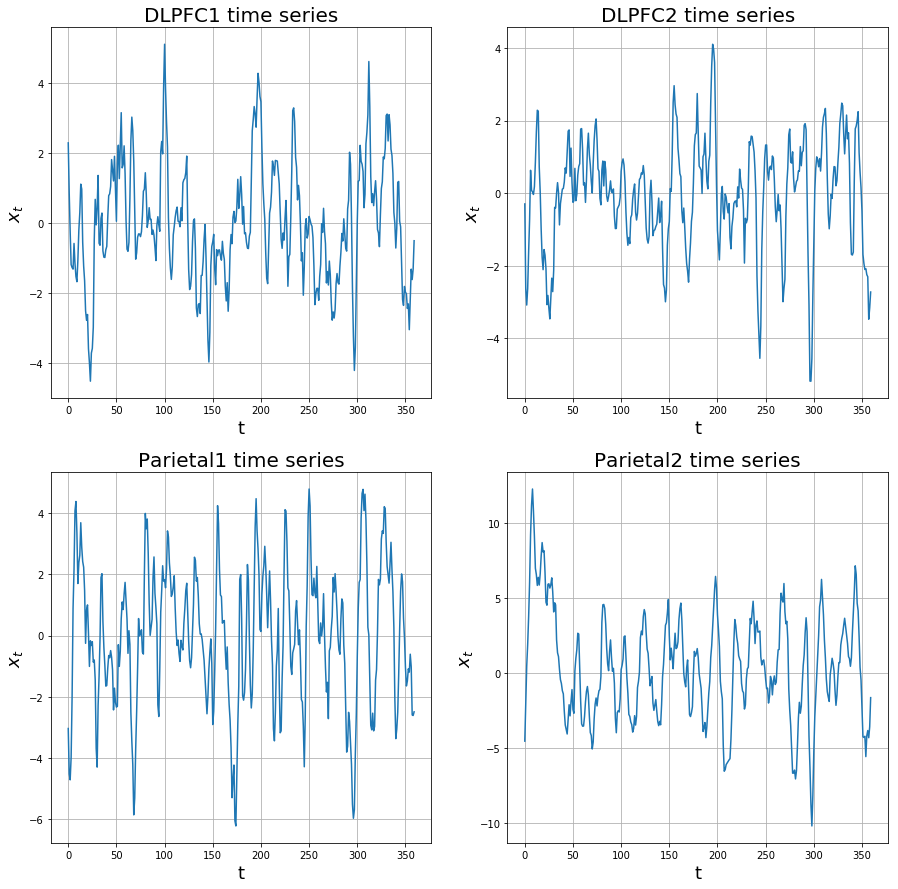

In [9]:
keys = list(mat_file.keys())
keys = keys[-4:]

multiple_data = mat_file[keys[0]]

for i in range(1,len(keys)):
    multiple_data = np.append(multiple_data, mat_file[keys[i]], axis = 1)
    
print(multiple_data.shape)

# Plot the time series
fig1 = plt.subplots(figsize=[15,15])

for i in range(len(keys)):

    plt.subplot(2,2,i+1)
    plt.plot(np.arange(0,len(data)), multiple_data[:,i])
    plt.xlabel('t', fontsize = 18)
    plt.ylabel(r'$x_t$', fontsize = 18)
    plt.grid()
    plt.title(keys[i]+" time series", fontsize = 20)

plt.show(fig1)

### 1) Estimate a VAR(1) model by performing multivariate regression on the 4-variate time series

In [10]:
# coefficient estimation for VAR(p)
def coeff_VAR(data, p):
    T = data.shape[0]
    n = data.shape[1]
    
    # define empty matrix
    A = np.zeros(( n, n*p+1 ))
    xT = np.zeros(T-p)
    Xp = np.zeros(( (T-p), n*p+1 ))
    
    # add column of 1s
    Xp[:,0] = np.zeros(T-p) + 1
    
    # fill matrix Xp
    for i in range(n):        
        for k in range(1,p+1):
            Xp[ :, i*p +k ] = data[p-k:-k, i]
        
    # compute coefficients
    for i in range(n):
        xT = data[p:, i]
        
        temp = np.matmul(np.transpose(Xp),Xp)
        temp = np.linalg.inv(temp)
        a = np.matmul(np.transpose(Xp),xT)
        a = np.matmul(temp,a)
        A[i] = a
    
    return A

# inferred time series
def pred(data, p):
    T = data.shape[0]
    n = data.shape[1]
    
    A = coeff_VAR(data, p)
    
    # define empty array
    x_new = np.zeros((data.shape[0],data.shape[1]))
    # set first p values
    x_new[:p] = multiple_data[:p]
    
    for i in range(p,T):
        x_new[i] = A[:,0] + np.dot(A[:,1:], np.flip(data[i-p:i],0).T).T
    
    return x_new

In [11]:
# coefficient estimation for VAR(1)
A = coeff_VAR(multiple_data, 1)
print('Intercepts:\n', A[:,0])
print('Coefficients:\n', A[:,1:])

Intercepts:
 [ 0.0024904  -0.00690006  0.00287008  0.03277537]
Coefficients:
 [[ 0.90668653 -0.02035257  0.01568962 -0.03375742]
 [ 0.00975233  0.89853182 -0.00518382 -0.00724422]
 [-0.01223154  0.04526295  0.87266454  0.00158463]
 [ 0.15398133 -0.0979815   0.01444375  0.93634082]]


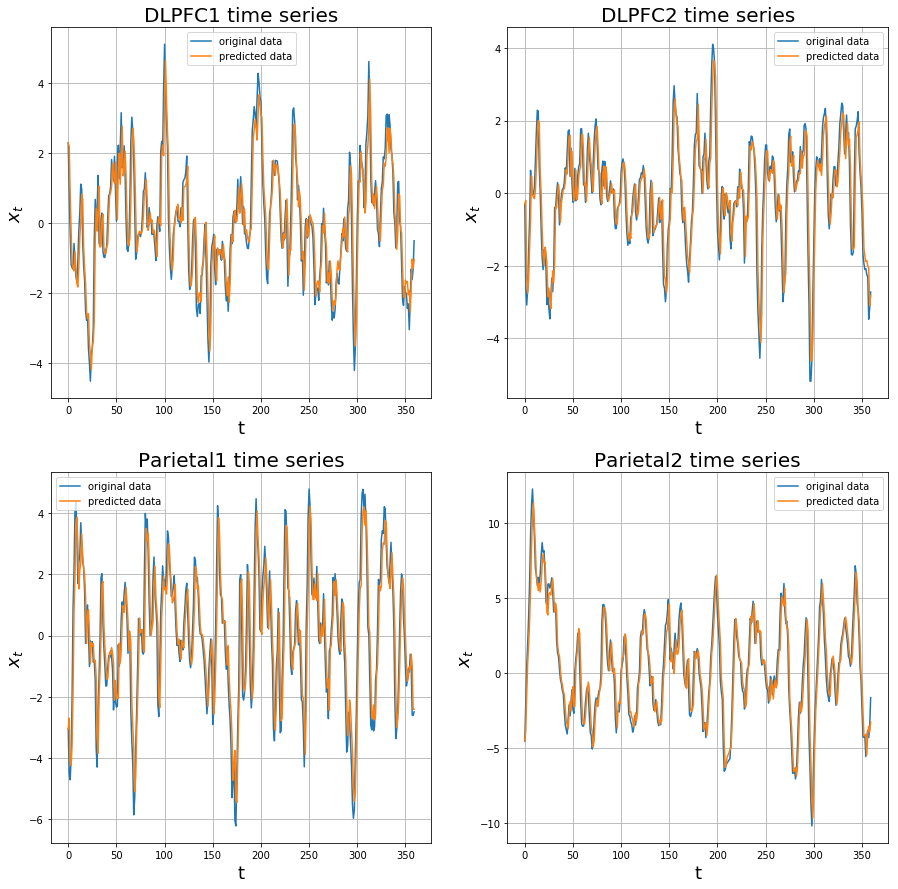

In [12]:
# Plot the predicted time series
fig1 = plt.subplots(figsize=[15,15])

pred_data = pred(multiple_data, 1)

for i in range(len(keys)):

    plt.subplot(2,2,i+1)
    plt.plot(np.arange(0,len(data)), multiple_data[:,i], label='original data')
    plt.plot(np.arange(0,len(data)), pred_data[:,i], label='predicted data')
    plt.xlabel('t', fontsize = 18)
    plt.ylabel(r'$x_t$', fontsize = 18)
    plt.grid()
    plt.legend()
    plt.title(keys[i]+" time series", fontsize = 20)

plt.show(fig1)

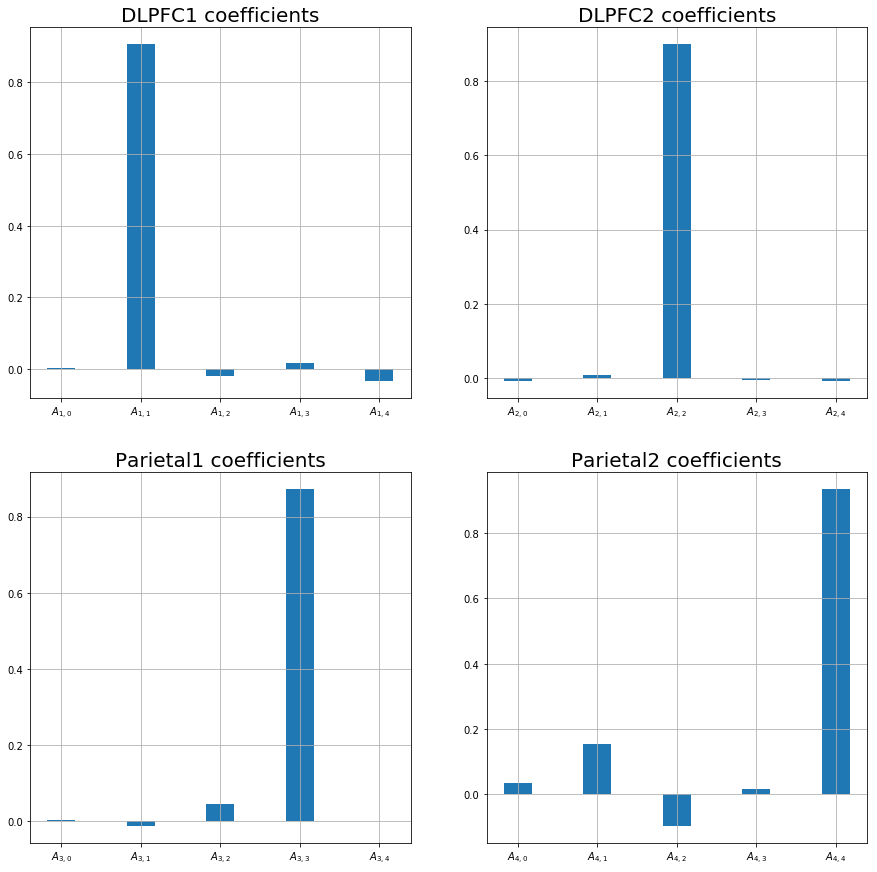

In [13]:
# Plot of the coefficients
fig1 = plt.subplots(figsize=[15,15])
width = 0.35 

for i in range(len(keys)):
    plt.subplot(2,2,i+1)
    
    plt.bar(np.arange(0,A.shape[1]), A[i,:], width)
    plt.xticks(np.arange(0,A.shape[1]),
               (r'$A_{%i,0}$'%(i+1), r'$A_{%i,1}$'%(i+1), r'$A_{%i,2}$'%(i+1), r'$A_{%i,3}$'%(i+1), r'$A_{%i,4}$'%(i+1)))
    plt.grid()
    plt.title(keys[i]+" coefficients", fontsize = 20)

plt.show(fig1)

### What do the coefficients in matrix A tell you about the coupling between the DLPFC and parietal cortex?

By looking at the plots above, it can be noticed that the biggest coefficient in all the plots is the one related to the considered time series: this means that the new outcomes are strongly related to the values of the same time series while weakly related to the other time series. The most relevant relations are the negative dependency of the values of the DLPFC1 time series respect to the Parietal2 ones, the positive dependency of the values of the Parietal time series respect to the DLPFC2 ones and the positive dependency of the values of the Parietal time series respect to the DLPFC1 ones and the negative dependency respect to the DLPFC2 ones.

###  Is the resulting VAR(1) model stationary or not?

In [14]:
# diagonalization of matrix A
eig = np.linalg.eigvals(A[:,1:])
print('Eigenvalues of coefficients matrix:\n', eig)
abs_eig = np.absolute(eig)
max_eig = np.max(abs_eig)
print('Modulus of the biggest eigenvalue:', max_eig)

Eigenvalues of coefficients matrix:
 [0.91404859+0.06443414j 0.91404859-0.06443414j 0.89306326+0.01125624j
 0.89306326-0.01125624j]
Modulus of the biggest eigenvalue: 0.9163168597973718


Since the modulus of the biggest eigenvalue of the coefficient matrix A is lower than 1, the VAR(1) model is stationary.

### 2) Determine the log-likelihood of this model

In [15]:
# Residuals of the VAR(p) model
def res(data, p):
    return pred(data,p)[p:] - data[p:]

# Covariance matrix of the residuals
def sigma(data, p):
    return np.cov(res(data, p).T)

# Log-likelihood for VAR(p) model
def log_likelihood(data, p):
    T = data.shape[0]
    n = data.shape[1]
    
    res1 = res(data, p)
    sigma1 = sigma(data, p)
    det = np.linalg.det(sigma1)
    square_res = res1**2
    
    t1 = - (T-p)*n/2. * np.log(2*np.pi)
    t2 = - (T-p)/2. * np.log(det)
    t3 = 0.
    for i in range(T-p):
        temp = np.dot(np.linalg.inv(sigma1), res1[i].T)
        t3 += np.dot(res1[i], temp)
    t3 = - t3 / 2.
    
    return t1 + t2 + t3

# Likelihood for VAR(p) model
def likelihood(data, p):
    return np.exp(log_likelihood(data, p))

In [16]:
# Determine the likelihood
ll = log_likelihood(multiple_data, 1)
print("Log-likelihood for VAR(1) model:", ll)

Log-likelihood for VAR(1) model: -1702.5083459286177


# Task 3

### 1) Create your own order 2 Poisson time series (assume no base rate)

In [17]:
# parameters
T = 1000

A1 = np.array(([0.2, -0.1],[0.1, 0.1]))
A2 = np.array(([0.1, -0.1],[0.1, 0.1]))

np.random.seed(0)

# define empty array
mu_t = np.zeros((2,T), dtype=np.float64)
mu_t[:,0] = [0.5, 0.5]

data = np.zeros((2,T), dtype=np.float64)
data[:,0] = np.random.poisson(mu_t[:,0])

In [18]:
# loop over each timestep
mu_t[:,1] = np.exp( np.dot(A1, data[:,0]) )
data[:,1] = np.random.poisson(mu_t[:,1])

for i in range(2,T):
    mu_t[:,i] = np.exp( np.dot(A1, data[:,i-1]) + np.dot(A2, data[:,i-2]) )
    data[:,i] = np.random.poisson(mu_t[:,i])

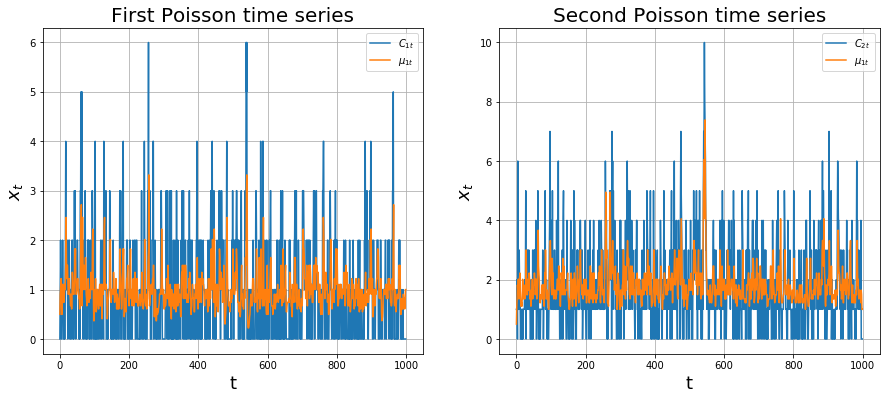

In [19]:
# Plot the generated TS
fig1 = plt.subplots(figsize=[15,6])

plt.subplot(1,2,1)
plt.plot(np.arange(T), data[0,:], label=r'$C_{1t}$')
plt.plot(np.arange(T), mu_t[0,:], label=r'$\mu_{1t}$')
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.legend()
plt.title('First Poisson time series', fontsize = 20)

plt.subplot(1,2,2)
plt.plot(np.arange(T), data[1,:], label=r'$C_{2t}$')
plt.plot(np.arange(T), mu_t[1,:], label=r'$\mu_{1t}$')
plt.xlabel('t', fontsize = 18)
plt.ylabel(r'$x_t$', fontsize = 18)
plt.grid()
plt.legend()
plt.title('Second Poisson time series', fontsize = 20)

plt.show(fig1)

### 2) Given the data generated in (1), vary the parameters A1(1,1) and A2(2,1) between 0 and 0.4 with 0.01 increments.

In [20]:
# Compute log-likelihood for a Poisson model
def poi_log_like(data, A1, A2):
    T = data.shape[1]
    
    # define empty matrix
    mu_t = np.zeros((2,T), dtype=np.float64)
    
    # compute mean series
    mu_t[:,0] = data[:,0]
    mu_t[:,1] = np.exp( np.dot(A1, data[:,0]) )
    for i in range(2,T):
        mu_t[:,i] = np.exp( np.dot(A1, data[:,i-1]) + np.dot(A2, data[:,i-2]) )

        
    # compute log-likelihood
    ll1 = np.sum( data[0,2:]*np.log(mu_t[0,2:]) - mu_t[0,2:] - np.log(special.factorial(data[0,2:])) )
    ll2 = np.sum( data[1,2:]*np.log(mu_t[1,2:]) - mu_t[1,2:] - np.log(special.factorial(data[1,2:])) )
    
    return ll1 + ll2

In [21]:
# evaluate log-likelihood for the parameter grid
par = np.arange(0.,0.41,0.01)
ll = np.zeros(( len(par), len(par) ))

for i in range(len(par)):
    for j in range(len(par)):
        A1[0,0] = par[i]
        A2[1,0] = par[j]
        ll[i,j] = poi_log_like(data, A1, A2)

In [22]:
# Maximum value of log-likelihood in the parameter grid
max_ll = np.amax(ll)
max_par = np.where(ll == max_ll)

print('Maximum value of the log-likelihood:', max_ll)
print('Parameters related to the maximum:')
print('A11 = ',par[max_par[0]][0])
print('A21 = ',par[max_par[1]][0])

Maximum value of the log-likelihood: -2871.458687410929
Parameters related to the maximum:
A11 =  0.19
A21 =  0.1


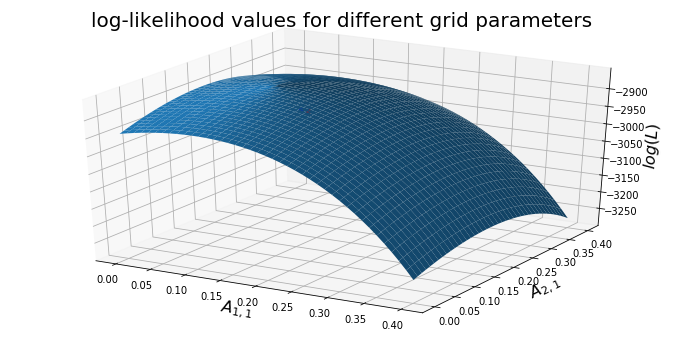

In [23]:
# 3-D plot of the log-likelihood values respect to the parameter grid
fig = plt.figure(figsize=[12,6])
X, Y = np.meshgrid(par, par)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, ll)
ax.scatter(0.2, 0.1,ll[20,10],color='r')
ax.scatter(par[max_par[0]][0], par[max_par[1]][0], ll[max_par],color='b')
ax.set_xlabel(r'$A_{1,1}$', fontsize = 16)
ax.set_ylabel(r'$A_{2,1}$', fontsize = 16)
ax.set_zlabel(r'$log(L)$', fontsize = 16)
ax.set_title('log-likelihood values for different grid parameters', fontsize = 20)
plt.show()

As we can notice from the calculations and the plot above, the model that best describes the Poisson generated time series (which corresponds to the one with the higher value of likelihood) is the one with parameters [A11 = 0.19, A21 = 0.10], that is very close to the original parameters in the parameter grid.